In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
d1 = pd.read_csv('D:/tele2_data_hack/email_reports.csv')
print(d1.shape)

(125938, 10)


In [3]:
d1.head()

,SENDER_ID,SENDER_EMAIL,OPERATOR_ID,ACCEPTOR,SUBJECT,To.queue.time,agent.receive.time,treatment.end.time,CONTENT,ANSWERTEXT
0,token_7747,xxxx@yandex.ru,token_48,spb.vopros@tele2.ru,Обратная связь,2088-06-17 02:31:32,2088-06-18 19:48:26,2088-06-18 20:24:59,Тело письма\r\n\r\nMSISDN: +xxx xxx xx xx\r\nО...,"\r\n\r\nЗдравствуйте, xxxxx xxxxx xxxxx!\r\n\r..."
1,token_14226,xxxx@mail.ru,token_50,Saransk.Vopros@tele2.ru,Re[2]: Обратная связь,2088-06-17 02:31:52,2088-06-18 18:43:45,2088-06-18 18:58:43,\r\nвся необходимая информация отображена в ...,"Здравствуйте, xxxxx xxxxx xxxxx!\r\nБлагодарим..."
2,token_23942,xxxx@mail.ru,token_3,rostov.vopros@tele2.ru,Обратная связь,2088-06-17 02:33:14,2088-06-18 18:43:45,2088-06-18 18:47:06,Тело письма\r\n\r\nMSISDN: +xxx xxx xx xx\r\nО...,"\r\n\r\nЗдравствуйте, xxxxx xxxxx xxxxx!\r\nБл..."
3,token_18368,xxxx@mail.ru,token_53,krasnodar.vopros@tele2.ru,Обратная связь,2088-06-17 02:33:36,2088-06-18 19:49:10,2088-06-18 19:53:57,Тело письма\r\n\r\nMSISDN: +xxx xxx xx xx\r\nО...,"\r\n\r\nЗдравствуйте, xxxxx xxxxx xxxxx! ¦\r\n..."
4,token_21039,xxxx@mail.ru,token_34,kostroma.vopros@tele2.ru,Обратная связь,2088-06-17 02:33:56,2088-06-18 19:49:17,2088-06-18 19:59:48,"Тело письма\r\n\r\nОтметьте, в каком регионе В...","\r\n\r\nАлександр, доброго времени суток! ;)\r..."


In [4]:
len(set(d1['SENDER_ID']))

44289

### number of emails 

In [5]:
temp = d1[['SENDER_ID','SENDER_EMAIL']].groupby('SENDER_ID').agg('count').reset_index()

In [6]:
np.unique(temp['SENDER_EMAIL'], return_counts=True)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   25,   26,   27,   29,   30,   31,   32,   34,   37,   40,
          41,   43,   45,   48,   56,   61,   63,   69,  137,  143,  173,
         174,  205,  293,  447,  450,  555,  583,  712,  794,  825,  878,
        1799, 2038, 2797, 5795], dtype=int64),
 array([14977,  7122, 16235,  3880,  1199,   416,   166,    96,    34,
           17,    18,    17,    13,    13,     4,     6,     8,     9,
            5,     3,     3,     4,     1,     2,     4,     2,     1,
            2,     1,     1,     1,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1], dtype=int64))

# determine fraction of each problem 

In [7]:
print(d1.shape)
d1 = d1[d1['CONTENT'].apply(lambda x: 'Тело письма' in str(x))].reset_index(drop=True)
print(d1.shape)

(125938, 10)
(102898, 10)


In [8]:
def get_topic(x):
    ret = ''
    try:
        ret = x.split('Выберите тему обращения: ')[1].split('\r')[0]
    except:
        pass
    return ret

def get_question(x):
    ret = ''
    try:
        ret = x.split('Выберите тему обращения: ')[1].split('\r')[1].split('\nЗадайте ваш вопрос или опишите проблему: ')[1]
    except:
        pass
    return ret


d1['topic'] = d1['CONTENT'].apply(lambda x: get_topic(x))
d1['question'] = d1['CONTENT'].apply(lambda x: get_question(x))

In [39]:
temp = d1[['topic','CONTENT']].groupby('topic').agg('count').reset_index()
num_q = np.sum(temp['CONTENT'])

In [40]:
temp = temp[temp['CONTENT']>1200].reset_index(drop=True)

In [51]:
temp['CONTENT_prc'] = temp['CONTENT'] / num_q * 100
print(np.sum(temp['CONTENT_prc']))

97.50335283484615


In [42]:
temp.sort_values(by='CONTENT_prc', ascending=False)

,topic,CONTENT,CONTENT_prc
8,прочее,24434,23.745845
10,тарифыИУслуги,18770,18.241365
3,мобильныйИнтернет,15918,15.469688
6,подключенныеУслуги,9112,8.855371
2,личныйКабинет,7379,7.171179
9,роумингИЗонаОбслуживания,6732,6.542401
7,поступлениеПлатежейОшибочныеПлатежи,6045,5.874750
1,детализацияСчётаИлиЗвонков,5474,5.319831
0,блокировкаИРазблокировкаSimКарты,2412,2.344069
5,подключениеКTele2,2398,2.330463


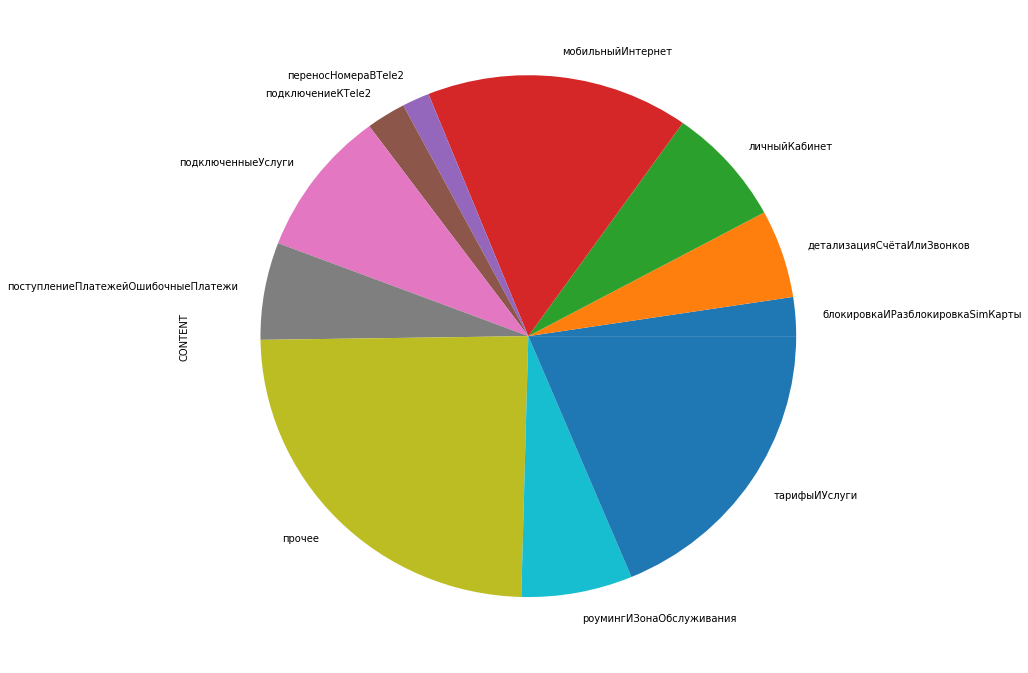

In [50]:
temp.set_index('topic')['CONTENT'].plot(kind='pie', subplots=True, figsize=(12, 12))
plt.show()

In [ ]:
print(temp['CONTENT'][4200])

In [ ]:
print(temp['ANSWERTEXT'][4200])

In [ ]:
temp = d1[['appeal_id','client_id','text']].groupby(['appeal_id','client_id'])['text'].apply(list)
temp = pd.DataFrame(temp).reset_index(drop=True)

In [ ]:
temp['text'] = temp['text'].apply(lambda x: [str(x) for x in x])
temp['text'] = temp['text'].apply(lambda x: x[0:2])
temp['text'] = temp['text'].apply(lambda x: ' '.join(x))

In [ ]:
temp.shape

In [ ]:
temp.head()

In [ ]:
temp.iloc[92]['text']